In [9]:
import pandas as pd
from glob import glob

raw_data = '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/'
out_dir = '/Users/catcamacho/Box/CCP/UGTV_study/DATA/ratings_q_agg/'
files = sorted(glob(raw_data + '*.csv'))

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

kjpos = []
kjneg = []
mlppos = []
mlpneg = []

for file in files:
    df = pd.read_csv(file,index_col=None,skiprows=[1,2,3,4,5],header=0,
                     usecols=['rating','participant','episode','rating_amplitude','rating_time'])
    df = df.iloc[:-2,:]
    df.index = pd.to_datetime(df['rating_time'],unit='s')
    subjid = df['participant'][0].astype(int)
    episode = df['episode'][0]
    rate = df['rating'][0]
    df = df.drop(['participant','episode','rating'],axis=1)
    df = df.resample('1s').mean().round(1)
    #df.index = pd.to_datetime(df['rating_time'], unit='s').dt.strftime('%M:%S.%f')
    #df.index.name='time'
    df=df.drop(['rating_time'], axis=1)
    df.columns=[str(subjid)]
    if episode == 'kj' and rate == 'Positive':
        kjpos.append(df)
    elif episode == 'kj' and rate == 'Negative':
        kjneg.append(df)
    elif episode == 'mlp' and rate == 'Positive':
        mlppos.append(df)
    elif episode == 'mlp' and rate == 'Negative':
        mlpneg.append(df)
        
kjpos = pd.concat(kjpos, axis=1)
kjneg = pd.concat(kjneg, axis=1)
mlppos = pd.concat(mlppos, axis=1)
mlpneg = pd.concat(mlpneg, axis=1)

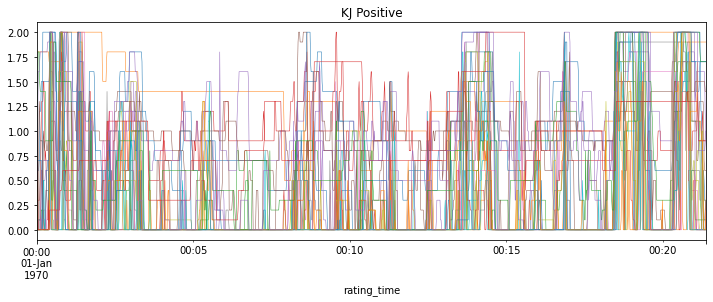

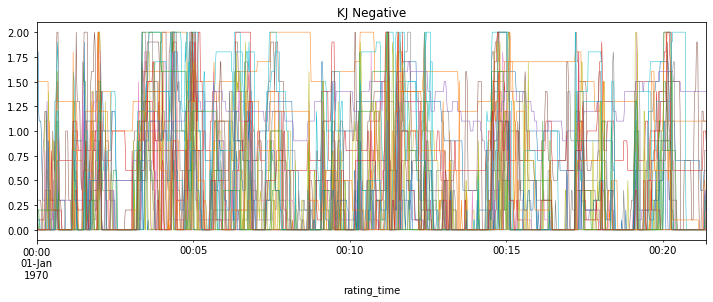

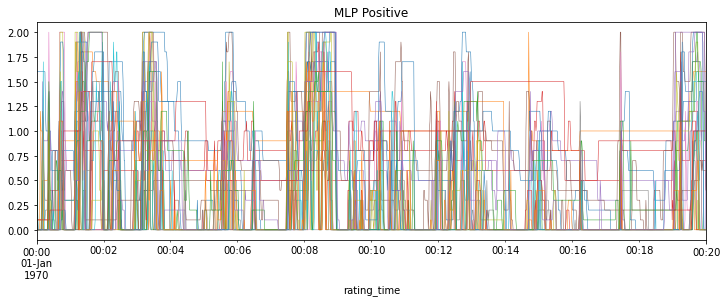

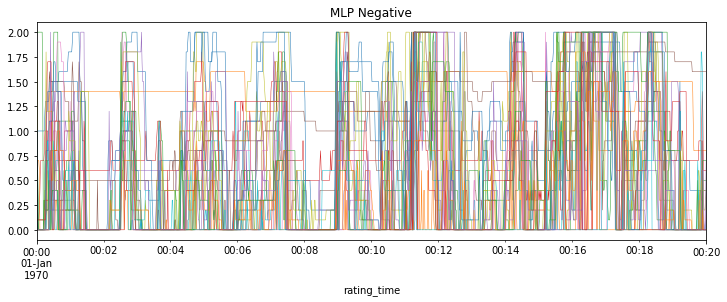

In [5]:
kjpos.plot(figsize=(12,4), linewidth=0.5,legend=None)
plt.title('KJ Positive')
plt.show()
plt.close()

kjneg.plot(figsize=(12,4), linewidth=0.5, legend=None)
plt.title('KJ Negative')
plt.show()
plt.close()

mlppos.plot(figsize=(12,4), linewidth=0.5, legend=None)
plt.title('MLP Positive')
plt.show()
plt.close()

mlpneg.plot(figsize=(12,4), linewidth=0.5, legend=None)
plt.title('MLP Negative')
plt.show()
plt.close()

In [10]:
from pandas import DataFrame
summary_stats = DataFrame()
summary_stats['MLPpos_mean'] = mlppos.mean(axis=0)
summary_stats['MLPneg_mean'] = mlpneg.mean(axis=0)
summary_stats['AHKJpos_mean'] = kjpos.mean(axis=0)
summary_stats['AHKJneg_mean'] = kjneg.mean(axis=0)
summary_stats['MLPpos_stdev'] = mlppos.std(axis=0)
summary_stats['MLPneg_stdev'] = mlpneg.std(axis=0)
summary_stats['AHKJpos_stdev'] = kjpos.std(axis=0)
summary_stats['AHKJneg_stdev'] = kjneg.std(axis=0)
summary_stats['MLPpos_range'] = mlppos.max(axis=0) - mlppos.min(axis=0)
summary_stats['MLPneg_range'] = mlpneg.max(axis=0) - mlpneg.min(axis=0)
summary_stats['AHKJpos_range'] = kjpos.max(axis=0) - kjpos.min(axis=0)
summary_stats['AHKJneg_range'] = kjneg.max(axis=0) - kjneg.min(axis=0)
summary_stats.index.name='participant_id'
summary_stats.to_csv(out_dir + 'sample_summary.csv')

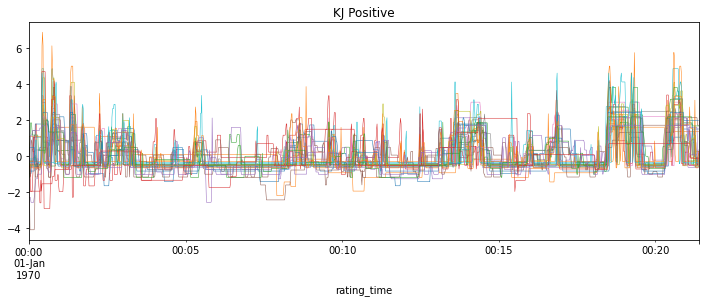

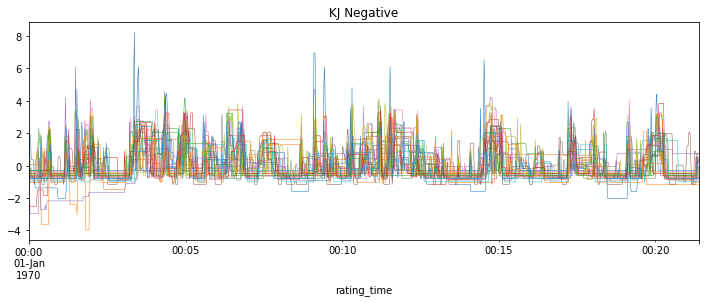

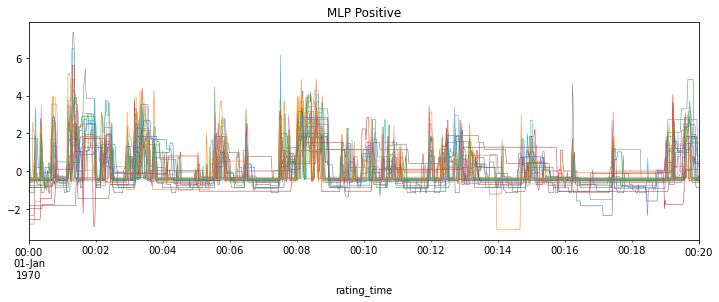

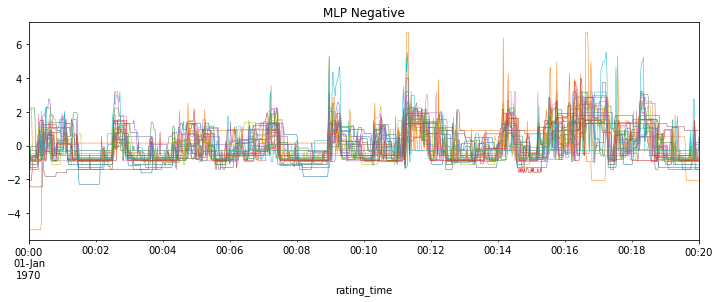

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

kjpos.loc[:,:]=ss.fit_transform(kjpos)
kjpos.plot(figsize=(12,4), linewidth=0.5, legend=None)
plt.title('KJ Positive')
plt.show()
plt.close()
kjneg.loc[:,:]=ss.fit_transform(kjneg)
kjneg.plot(figsize=(12,4), linewidth=0.5, legend=None)
plt.title('KJ Negative')
plt.show()
plt.close()
mlppos.loc[:,:]=ss.fit_transform(mlppos)
mlppos.plot(figsize=(12,4), linewidth=0.5, legend=None)
plt.title('MLP Positive')
plt.show()
plt.close()
mlpneg.loc[:,:]=ss.fit_transform(mlpneg)
mlpneg.plot(figsize=(12,4), linewidth=0.5, legend=None)
plt.title('MLP Negative')
plt.show()
plt.close()

In [12]:
ahkj_ratings = DataFrame(index=kjneg.index)
ahkj_ratings['Positive'] = kjpos.mean(axis=1)
ahkj_ratings['Negative'] = kjneg.mean(axis=1)
ahkj_ratings.to_csv(out_dir + 'AHKJ_ratings.csv')
mlp_ratings = DataFrame(index=mlpneg.index)
mlp_ratings['Positive'] = mlppos.mean(axis=1)
mlp_ratings['Negative'] = mlpneg.mean(axis=1)
mlp_ratings.to_csv(out_dir + 'MLP_ratings.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  if __name__ == '__main__':


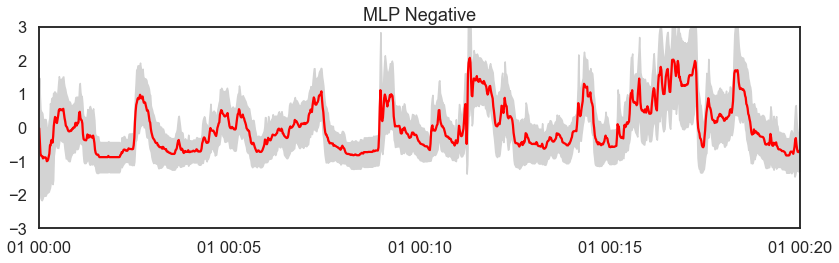

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.


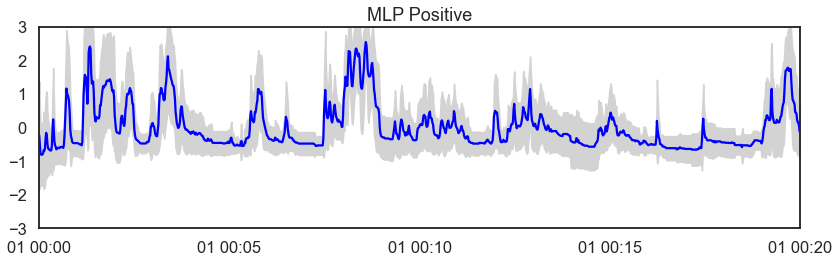

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.


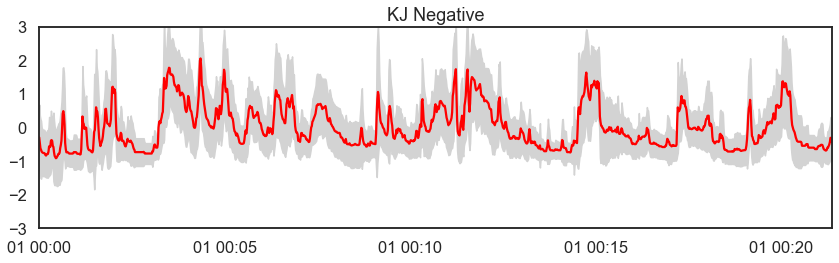

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.


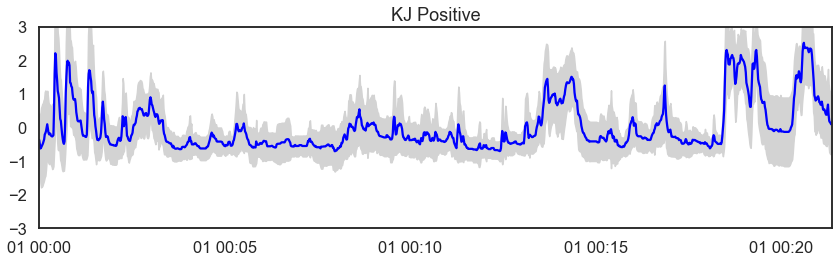

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='talk',style='white')

mean = mlpneg.mean(axis=1)
plt.figure(figsize=(12,4))
plt.fill_between(mean.index,mean-mlpneg.std(axis=1),mean+mlpneg.std(axis=1),color='lightgray')
plt.plot(mlpneg.index,mean,'k-',color='red')
plt.xlim((mlpneg.index[0],mlpneg.index[-1]))
plt.ylim((-3,3))
plt.title('MLP Negative')
plt.tight_layout()
plt.savefig(out_dir + 'mlp_neg.png')
plt.show()
plt.close()

mean = mlppos.mean(axis=1)
plt.figure(figsize=(12,4))
plt.fill_between(mean.index,mean-mlppos.std(axis=1),mean+mlppos.std(axis=1),color='lightgray')
plt.plot(mlppos.index,mean,'k-',color='blue')
plt.xlim((mlppos.index[0],mlpneg.index[-1]))
plt.ylim((-3,3))
plt.title('MLP Positive')
plt.tight_layout()
plt.savefig(out_dir + 'mlp_pos.png')
plt.show()
plt.close()

mean = kjneg.mean(axis=1)
plt.figure(figsize=(12,4))
plt.fill_between(mean.index,mean-kjneg.std(axis=1),mean+kjneg.std(axis=1),color='lightgray')
plt.plot(kjneg.index,mean,'k-',color='red')
plt.xlim((kjneg.index[0],kjneg.index[-1]))
plt.ylim((-3,3))
plt.title('KJ Negative')
plt.tight_layout()
plt.savefig(out_dir + 'kj_neg.png')
plt.show()
plt.close()

mean = kjpos.mean(axis=1)
plt.figure(figsize=(12,4))
plt.fill_between(mean.index,mean-kjpos.std(axis=1),mean+kjpos.std(axis=1),color='lightgray')
plt.plot(kjpos.index,mean,'k-',color='blue')
plt.xlim((kjpos.index[0],kjpos.index[-1]))
plt.ylim((-3,3))
plt.title('KJ Positive')
plt.tight_layout()
plt.savefig(out_dir + 'kj_pos.png')
plt.show()
plt.close()

## Compute reliability across raters

In [14]:
kjpos = kjpos.resample('1s').mean()
kjposv = kjpos.stack().to_frame('ratings')
kjposv['rater'] = kjposv.index.get_level_values(1)
kjposv['time'] = kjposv.index.get_level_values(0).time
kjposv = kjposv.droplevel(1)

kjneg = kjneg.resample('1s').mean()
kjnegv = kjneg.stack().to_frame('ratings')
kjnegv['rater'] = kjnegv.index.get_level_values(1)
kjnegv['time'] = kjnegv.index.get_level_values(0).time
kjnegv = kjnegv.droplevel(1)

mlppos = mlppos.resample('1s').mean()
mlpposv = mlppos.stack().to_frame('ratings')
mlpposv['rater'] = mlpposv.index.get_level_values(1)
mlpposv['time'] = mlpposv.index.get_level_values(0).time
mlpposv = mlpposv.droplevel(1)

mlpneg = mlpneg.resample('1s').mean()
mlpnegv = mlpneg.stack().to_frame('ratings')
mlpnegv['rater'] = mlpnegv.index.get_level_values(1)
mlpnegv['time'] = mlpnegv.index.get_level_values(0).time
mlpnegv = mlpnegv.droplevel(1)

In [15]:
import pingouin as pg

icc_df = pd.DataFrame(columns=['itemICC','meanICC'])

## KJ positive
print('##### KJ Positive #####')
icc = pg.intraclass_corr(data=kjposv, targets='time',raters='rater',ratings='ratings', nan_policy='omit').round(3)
icc_df.loc['KJpositive',:]=[icc.loc[1,'ICC'],icc.loc[4,'ICC']]
print(icc.set_index('Type'))
print('')

## KJ negative
print('##### KJ Negative #####')
icc = pg.intraclass_corr(data=kjnegv, targets='time',raters='rater',ratings='ratings', nan_policy='omit').round(3)
icc_df.loc['KJNegative',:]=[icc.loc[1,'ICC'],icc.loc[4,'ICC']]
print(icc.set_index('Type'))
print('')

## KJ positive
print('##### MLP Positive #####')
icc = pg.intraclass_corr(data=mlpposv, targets='time',raters='rater',ratings='ratings', nan_policy='omit').round(3)
icc_df.loc['MLPpositive',:]=[icc.loc[1,'ICC'],icc.loc[4,'ICC']]
print(icc.set_index('Type'))
print('')

## KJ positive
print('##### MLP Negative #####')
icc = pg.intraclass_corr(data=mlpnegv, targets='time',raters='rater',ratings='ratings', nan_policy='omit').round(3)
icc_df.loc['MLPnegative',:]=[icc.loc[1,'ICC'],icc.loc[4,'ICC']]
print(icc.set_index('Type'))
print('')

icc_df.to_csv('/Users/catcamacho/Box/CCP/UGTV_study/DATA/ratings_q_agg/ratings_iccs.csv')

##### KJ Positive #####


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


                   Description    ICC       F   df1    df2  pval         CI95%
Type                                                                          
ICC1    Single raters absolute  0.476  23.684  1283  30816   0.0   [0.46, 0.5]
ICC2      Single random raters  0.476  23.665  1283  30792   0.0   [0.46, 0.5]
ICC3       Single fixed raters  0.476  23.665  1283  30792   0.0   [0.46, 0.5]
ICC1k  Average raters absolute  0.958  23.684  1283  30816   0.0  [0.95, 0.96]
ICC2k    Average random raters  0.958  23.665  1283  30792   0.0  [0.95, 0.96]
ICC3k     Average fixed raters  0.958  23.665  1283  30792   0.0  [0.95, 0.96]

##### KJ Negative #####
                   Description    ICC       F   df1    df2  pval         CI95%
Type                                                                          
ICC1    Single raters absolute  0.347  13.760  1283  29532   0.0  [0.33, 0.37]
ICC2      Single random raters  0.347  13.749  1283  29509   0.0  [0.33, 0.37]
ICC3       Single fixed rat

# Score questionnaire data

In [32]:
q_raw = pd.read_csv('/Users/catcamacho/Box/CCP/UGTV_study/DATA/questionnaires/exports/UndergradTVStudy_DATA_2021-04-27_1401.csv',
                    index_col=0,na_values='99')
panasc_items = []
for a in q_raw.columns:
    if 'panas_c' in a:
        panasc_items.append(a)
panasc_raw = q_raw[['redcap_repeat_instance'] + panasc_items]
panasc_raw = panasc_raw.dropna(axis=0)
panasc_raw['PANASCpos'] = panasc_raw[['panas_c_1','panas_c_3','panas_c_5','panas_c_9',
                                     'panas_c_10','panas_c_12','panas_c_14','panas_c_16',
                                     'panas_c_17','panas_c_19']].sum(axis=1) 
panasc_raw['PANASCneg'] = panasc_raw[['panas_c_2','panas_c_4','panas_c_6','panas_c_7',
                                     'panas_c_8','panas_c_11','panas_c_13','panas_c_15',
                                     'panas_c_18','panas_c_20']].sum(axis=1) 

In [33]:
t = panasc_raw[['redcap_repeat_instance','PANASCpos', 'PANASCneg']]
t.index.name='redcapid'
panasc = t.pivot_table(index='redcapid',columns='redcap_repeat_instance')
panasc.columns = panasc.columns.droplevel().rename(None)
panasc.columns = ['PANASCneg_{0}'.format(x) for x in range(1,7)] + ['PANASCpos_{0}'.format(x) for x in range(1,7)]

In [ ]:
q_data = q_raw.dropna(subset=['participant_id'])
# score 2wk PANAS
q_data['PANAS2wkpos'] = q_data.loc[:,['panas_w2_1','panas_w2_3','panas_w2_5','panas_w2_9',
                                     'panas_w2_10','panas_w2_12','panas_w2_14','panas_w2_16',
                                     'panas_w2_17','panas_w2_19']].sum(axis=1) 
q_data['PANAS2wkneg'] = q_data.loc[:,['panas_w2_2','panas_w2_4','panas_w2_6','panas_w2_7',
                                     'panas_w2_8','panas_w2_11','panas_w2_13','panas_w2_15',
                                     'panas_w2_18','panas_w2_20']].sum(axis=1) 
# score AIM
q_data['AIMposint'] = q_data.loc[:,['aim_2','aim_7','aim_8','aim_18','aim_20','aim_22','aim_35']].sum(axis=1)
q_data['AIMposreac'] = q_data.loc[:,['aim_1','aim_5','aim_9','aim_10','aim_14','aim_23','aim_27','aim_38']].sum(axis=1)
q_data['AIMnegint'] = q_data.loc[:,['aim_6','aim_15','aim_30','aim_34','aim_36','aim_39']].sum(axis=1)
q_data['AIMnegreac'] = q_data.loc[:,['aim_4','aim_11','aim_13','aim_17','aim_21','aim_25']].sum(axis=1)
q_data['AIMtotal'] = q_data.loc[:,['aim_{0}'.format(x) for x in range(1,41)]].sum(axis=1)

# score ATQ
q_data['atq_68r'] = 8 - q_data['atq_68']
q_data['atq_75r'] = 8 - q_data['atq_75']
q_data['atq_6r'] = 8 - q_data['atq_6']
q_data['atq_38r'] = 8 - q_data['atq_38']
q_data['atq_58r'] = 8 - q_data['atq_58']
q_data['atq_9r'] = 8 - q_data['atq_9']
q_data['atq_20r'] = 8 - q_data['atq_20']
q_data['atq_34r'] = 8 - q_data['atq_34']
q_data['atq_2r'] = 8 - q_data['atq_2']
q_data['atq_8r'] = 8 - q_data['atq_8']
q_data['atq_72r'] = 8 - q_data['atq_72']
q_data['atq_5r'] = 8 - q_data['atq_5']
q_data['atq_29r'] = 8 - q_data['atq_29']
q_data['atq_40r'] = 8 - q_data['atq_40']
q_data['atq_50r'] = 8 - q_data['atq_50']
q_data['atq_53r'] = 8 - q_data['atq_53']
q_data['atq_60r'] = 8 - q_data['atq_60']
q_data['atq_63r'] = 8 - q_data['atq_63']
q_data['atq_14r'] = 8 - q_data['atq_14']
q_data['atq_46r'] = 8 - q_data['atq_46']
q_data['atq_7r'] = 8 - q_data['atq_7']
q_data['atq_44r'] = 8 - q_data['atq_44']
q_data['atq_77r'] = 8 - q_data['atq_77']
q_data['atq_16r'] = 8 - q_data['atq_16']
q_data['atq_70r'] = 8 - q_data['atq_70']
q_data['atq_10r'] = 8 - q_data['atq_10']
q_data['atq_33r'] = 8 - q_data['atq_33']
q_data['atq_71r'] = 8 - q_data['atq_71']
q_data['atq_66r'] = 8 - q_data['atq_66']

q_data['ATQfea'] = q_data.loc[:,['atq_1', 'atq_12', 'atq_22', 'atq_51', 'atq_61', 'atq_68r', 'atq_75r']].mean(axis=1)
q_data['ATQfru'] = q_data.loc[:,['atq_6r', 'atq_17', 'atq_31', 'atq_38r', 'atq_48', 'atq_58r']].mean(axis=1)
q_data['ATQsad'] = q_data.loc[:,['atq_9r', 'atq_20r', 'atq_25', 'atq_34r', 'atq_45', 'atq_56', 'atq_65']].mean(axis=1) 
q_data['ATQdis'] = q_data.loc[:,['atq_4', 'atq_32', 'atq_36', 'atq_42', 'atq_54', 'atq_59']].mean(axis=1) 
q_data['ATQacv'] = q_data.loc[:,['atq_2r', 'atq_8r', 'atq_15', 'atq_27', 'atq_47', 'atq_55', 'atq_72r']].mean(axis=1) 
q_data['ATQatt'] = q_data.loc[:,['atq_5r', 'atq_29r', 'atq_35', 'atq_40r', 'atq_50r']].mean(axis=1) 
q_data['ATQinh'] = q_data.loc[:,['atq_11', 'atq_26', 'atq_43', 'atq_53r', 'atq_60r', 'atq_63r', 'atq_76']].mean(axis=1) 
q_data['ATQsoc'] = q_data.loc[:,['atq_14r', 'atq_19', 'atq_37', 'atq_46r', 'atq_67']].mean(axis=1) 
q_data['ATQhig'] = q_data.loc[:,['atq_7r', 'atq_23', 'atq_30', 'atq_44r', 'atq_64', 'atq_73', 'atq_77r']].mean(axis=1)  
q_data['ATQpos'] = q_data.loc[:,['atq_3', 'atq_16r', 'atq_28', 'atq_49', 'atq_70r']].mean(axis=1) 
q_data['ATQnps'] = q_data.loc[:,['atq_10r', 'atq_21', 'atq_33r', 'atq_52', 'atq_71r']].mean(axis=1) 
q_data['ATQaps'] = q_data.loc[:,['atq_13', 'atq_18', 'atq_57', 'atq_66r', 'atq_69']].mean(axis=1) 
q_data['ATQase'] = q_data.loc[:,['atq_24', 'atq_39', 'atq_41', 'atq_62', 'atq_74']].mean(axis=1) 
q_data['ATQNegAff'] = q_data.loc[:,['ATQfea','ATQsad','ATQfru','ATQdis']].mean(axis=1)
q_data['ATQExtSur'] = q_data.loc[:,['ATQsoc','ATQpos','ATQhig']].mean(axis=1)
q_data['ATQEffCon'] = q_data.loc[:,['ATQatt','ATQinh','ATQacv']].mean(axis=1)
q_data['ATQPercSens'] = q_data.loc[:,['ATQase','ATQaps','ATQnps']].mean(axis=1)

# score ERQ
q_data['ERQreapp'] = q_data.loc[:,['erq_1','erq_3','erq_5','erq_7','erq_8','erq_10']].mean(axis=1)
q_data['ERQsupp'] = q_data.loc[:,['erq_2','erq_4','erq_6','erq_9']].mean(axis=1)

# pull out just the scores for saving
data = q_data[['participant_id','study_date','PANAS2wkpos','PANAS2wkneg','AIMposint','AIMposreac','AIMnegint',
               'AIMnegreac','AIMtotal','ATQfea','ATQsad','ATQfru','ATQdis','ATQsoc','ATQpos','ATQhig',
               'ATQatt','ATQinh','ATQacv','ATQase','ATQaps','ATQnps','ATQNegAff','ATQExtSur','ATQEffCon',
               'ATQPercSens','ERQreapp','ERQsupp','demo_sex','demo_age','demo_ethnicity','demo_language','demo_race',
               'demo_education','demo_marital_status','demo_employment','demo_household_income','demo_handedness']]
data = data.join(panasc)
data.index = data['participant_id'].astype(int).astype(str)
data = data.drop('participant_id',axis=1)
data = data.join(summary_stats)
data.to_csv('/Users/catcamacho/Box/CCP/UGTV_study/DATA/questionnaires/exports/UGTV_qdata_scored.csv')
data.describe().to_csv('/Users/catcamacho/Box/CCP/UGTV_study/DATA/questionnaires/exports/UGTV_qdata_describe.csv')